# Introduction to Keras

## Introduction

Thus far we have a solid basic conceptual understanding of neural networks and their basic architecture. We've seen nueral networks for classification including a neural network with no hidden layers (logistic regression), one hidden layer, and several hidden layers. From here, we'll begin to use Keras, a package that has prebuilt many of the building blocks of neural networks which we investigated in previous lessons.  

## Objectives

You will be able to:
* Explain what a tensor is
* Explain and perform tensor slicing
* Explain element-wise operations, broadcast operations, and the dot product
* Explain the steps to build a neural network in Keras
* Explain the concept of batches

## Taking a step back: tensors and data representations

Until now, we haven't really discussed the shape of our data in detail.  
Let's briefly discuss data representations in neural networks (the building blocks are "tensors")

- Scalars = 0D tensors
- Vectors = 1D tensors
- Matrices = 2D tensors
- 3D tensors

A tensor is defined by three key attributes:
- rank or number of axes
- the shape
- the data type

## Some important data manipulations in NumPy

### Unrowing matrices (important for images)

eg Santa: `(790, 64, 64, 3)` matrix to a `(64*64*3, 790)` matrix!

```{python} 
img_unrow = img.reshape(790, -1).T  
```

### Increasing the rank

vector with `np.shape() (790,)`

```{python} 
np.reshape(vector, (1,790)) 
```


### Tensor slicing

We've actually already seen this in previous lectures and labs, although not explicitly. Just like python's native lists, or NumPy arrays, we can slice tensors using the usual syntax:  

```tensor[start_idx : end_idx]```.

As with lists and NumPy arrays, this will include the start_idx element up to, but not including the end_idx element.

Below is a brief example.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] #Select an arbitrary case for our example

#Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

#Now performing some slices of our image:
print('Tensor Slice [0:100] shape:', train_images[:100].shape)

#Equivalently
print('Tensor Slice [0:100] shape:', train_images[:100, :, :].shape)

#Or verbosely:
print('Tensor Slice [0:100] shape:', train_images[:100, :28, :28].shape)


plt.imshow(digit, cmap=plt.cm.binary) #Display an example image for context
plt.show()

Using TensorFlow backend.


In the above example, we sliced our tensor to obtain 100 of the 60,000 images. You can also slice tensors along other axes. For example, the 1st dimension is which image we are referring two, while the 2nd and 3rd axis are the pixels of these images themselves.For example, we could limit the images to the bottom right hand quadrant like this:

Sliced tensor shape (includes all images but only the lower right hand corner of each: (60000, 14, 14)


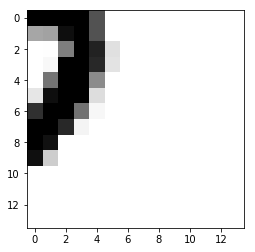

In [2]:
lower_right_quadrant = train_images[:,14:,14:]
print('Sliced tensor shape (includes all images but only the lower right hand corner of each:',
      lower_right_quadrant.shape)
plt.imshow(lower_right_quadrant[10], cmap=plt.cm.binary) #Display the 10th image from our sliced tensor.
plt.show()

### Tensor Operations
    * Element-wise
    * Broadcasting
    * Tensor Dot
    
These are the three main operations that you will see in future implementations. Element-wise addition (or other operations) simply updates each element with the corresponding element from another tensor. For example, here is the result of an element-wise addition of two NumPy arrays:

In [3]:
import numpy as np
np.array([1,2,3,4]) + np.array([5,6,7,8])

array([ 6,  8, 10, 12])

Broadcasting operations can be used when tensors are of different dimensions. For example, we could add the vector [1,2,3] to a 3 by 4 matrix like this:

In [4]:
A = np.array(range(12)).reshape(4,3)
print('A:\n', A, '\n')

B = np.array([1,2,3])#.reshape(1, -1)
print('B:', B, '\n')

A += B #Update with broadcasting
print('Updated A:\n', A)

A:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

B: [1 2 3] 

Updated A:
 [[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


Noticed how B was broadcasted across A; a copy of B was added to each row in A.
Finally, as with our previous work with linear algebra, we will also commonly take the dot product of tensors.
Recall that this is the sum of the element-wise products. Let's start with a very simple example:

In [5]:
#Recall that B is the vector [1,2,3]
#Taking the dot product of B and itself is equivalent to
#1*1 + 2*2 + 3*3 = 1 + 4 + 9 = 14
print(np.dot(B,B))

14


Examining a slightly more complex example:

In [6]:
A = np.array(range(12)).reshape(4,3)
print('A:\n', A, '\n')

B = np.array([1,2,3])#.reshape(1, -1)
print('B:', B, '\n')

np.dot(A, B)

A:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

B: [1 2 3] 



array([ 8, 26, 44, 62])

Here the first element is the sum of the first row of A multiplied by B elementwise:  
0*1 + 1*2 + 2*3 = 0 + 2 + 6 = 8  

Followed by the sum of the second row of A multiplied by B elementwise:  
3*1 + 4*2 + 5*3 = 3 + 8 + 15 = 26

and so on.

## Building a Neural Network with Keras

### Importing the packages

As usual, we need to import some packages...

In [7]:
from keras import models
from keras import layers
from keras import optimizers

### Deciding on the network architecture

Afterwards, we define the type of network. We will discuss other network types later, but to date, we have examined sequential models; one layer builds upon the previous one and continues to chain until the end.

```{python}
model = models.Sequential()
```

### Adding layers

Once we have initialized a network object as shown above, we can then add layers to the network which includes the number of layers we wish to add, as well as which activiation function we hope to use. For example, when coding from scratch, we previously used the sigmoid and ReLu activation functions.   

The `Dense` method indicates that this layer will be fully connected. There are other layer architectures that we will discuss further in upcoming labs and lessons.

Finally, the `input_shape` parameter is often optional. That is, in successive layers, Keras implies the required shape of the layer to be added based on the shape of the previous layer.

```{python}
model.add(layers.Dense(units, activation, input_shape))
```

### Compiling the model

Once we have defined the network architecture and added layers to that network, we then compile the model before then training that model on our data.  

```{python}
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])
```

Notice that this is also where we define our loss function. 

### Training the model

```{python}
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
```

Why batches? if you push all your samples through at once, you have to wait until everything is processed and can only start backpropagating then. Therefore, batches are used, so that after each batch has done a forward propagation step, backward propagation can happen again. In essence, it's "mini-batch" gradient descent.


Here's some further notes regarding these terms from the Keras documentation FAQ:


* **Sample**: one element of a dataset.  
    * *Example*: one image is a sample in a convolutional network  
    * *Example*: one audio file is a sample for a speech recognition model  
    
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.  
* A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).


### Plotting 

When we fit the model as shown above, we not only update the model object itself, we are also returned a history associated with the model. (Hence our variable name.) With this, we can retrieve further information regarding how the model training progressed from epoch to epoch. To do this, you can access the history attribute of the returned object. Given our variable naming above, we would thus have:

```history.history```

This will return a dictionary of the metrics we indicated when compiling the model. By default, the loss criteria will always be included as well. So in our example, this dictionary will have 2 keys, one for the loss, and one for the accuracy. If you wish to plot learning curves for the loss or accuracy versus the epochs, you can then simply retrieve these lists. For example:

```history.history['loss']```

would return a list of the loss at each epoch.

## Making Predictions

As with sci-kit learn and other prebuilt packages, making predictions from a trained model is relatively straightforward. To do this, you can simply use the `predict` method built into the model object. For example:  
```{python}
y_hat = model.predict(x)
```

## Evaluating the Model

Now that the model has been trained, our predictions are applying that model to the data. Similarly, we can use the `evaluate` method in order to compute the loss and other specified metrics for our trained model.

For example,   

```model.evaluate(X_train, X_train_labels)``` will return the final loss associated with the model for the training data as well as any other metrics that were specified during compilation.

Similarly, 

```model.evaluate(X_test, X_test_labels)``` will return the final loss associated with the model for the test data as well as any other specified metrics.


## Additional Resources
    
* https://keras.io/getting-started/
* https://keras.io/getting-started/sequential-model-guide/#compilation
* https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop
* https://www.coursera.org/learn/deep-neural-network/lecture/qcogH/mini-batch-gradient-descent
* A full book on Keras by the author of Keras himself:  
    https://www.manning.com/books/deep-learning-with-python

## Summary

In this lesson, we began to introduce some of the basic components of building a neural network using Keras. In the upcoming lab you will begin to put these concepts into practice.